In [1]:
import json
import pandas as pd
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from climate import EarthModel
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
model = EarthModel('parameters.json')

## Problem 2
In the case of suppressed intra-zonal transfer, the steady state temperature in each zone can be directly computed

$$
T_k^4 = \frac{\gamma_k(1 - \alpha^{\text{sky}})(1 - \bar{\alpha_k})S_0}{\tau \sigma_B}
$$

In [3]:
T = (model.flux_in / model.flux_out)**(0.25)
for i in range(model.size):
    print('Teq Zone {}: {:.2f} K'.format(i, T[i]))

Teq Zone 0: 217.23 K
Teq Zone 1: 279.74 K
Teq Zone 2: 296.45 K
Teq Zone 3: 294.56 K
Teq Zone 4: 263.56 K
Teq Zone 5: 225.33 K


When intra-zonal transfer is allowed, steady state temperature can be found by solving a system of nonlinear equations
$$
F_k = \gamma_k(1 - \alpha^{\text{sky}})(1 - \bar{\alpha_k})S_0 - \tau \sigma_b T_k^4 +
\frac{1}{A_k \bar{\beta_k}} \sum_i L_{ik}k_{ik}(T_i - T_k) = 0
$$
where $\bar{\beta_k} = \overline{\rho_k c_k [z_k]}$ and the sum is taken over the neighbouring zones

In [4]:
F = model.flux_balance
sol = root(F, T)
for i in range(model.size):
    print('Teq Zone {}: {:.2f} K'.format(i, sol.x[i]))

Teq Zone 0: 274.12 K
Teq Zone 1: 279.34 K
Teq Zone 2: 282.26 K
Teq Zone 3: 280.88 K
Teq Zone 4: 279.71 K
Teq Zone 5: 274.93 K


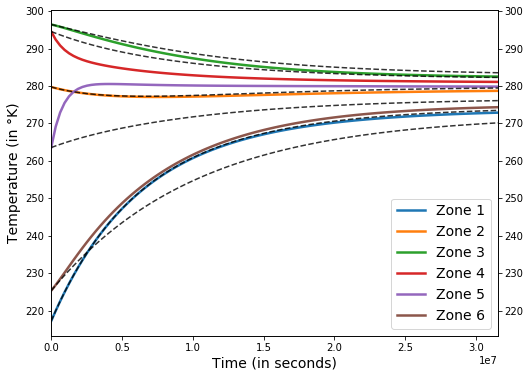

In [5]:
# We can also solve this by integrating the model to equilibrium
model.k45 = 5e7
model.t0 = 0
model.tf = 10 * 3.154e+7 # Years
model.tn = 1000
model.T0 = T
model.build_ode(lambda t, T: model.flux_balance(T))
model.solve()

# Plot solution
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
for i in range(model.size):
    model.k45 = 5e7
    ax.plot(model.t, model.T[:, i], linewidth = 2.5, label='Zone {}'.format(i+1))
model.k45 = 1e7
model.t0 = 0
model.tf = 10 * 3.154e+7 # Years
model.tn = 1000
model.T0 = T
model.build_ode(lambda t, T: model.flux_balance(T))
model.solve()
ax2 = ax.twinx()
lines = ax2.plot(model.t, model.T, '--', color='black', alpha = 0.8)
ax.legend(loc=0,fontsize = 14)
ax.set_xlabel("Time (in seconds)",fontsize = 14)
ax.set_ylabel('Temperature (in °K)',fontsize = 14)
ax.set_xlim((0, 3.154e+7))
plt.savefig('Question2.pdf')
